In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/research/Data/

/content/drive/My Drive/research/Data


In [ ]:
df = pd.read_csv('sinhala_df_annotated.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12742 entries, 0 to 12741
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment_id    12742 non-null  object
 1   video_id      12482 non-null  object
 2   video_title   12482 non-null  object
 3   text          12742 non-null  object
 4   timestamp     12725 non-null  object
 5   author        12722 non-null  object
 6   author_email  12725 non-null  object
 7   reply_to      261 non-null    object
 8   Label         998 non-null    object
 9   Domain        367 non-null    object
 10  About         275 non-null    object
dtypes: object(11)
memory usage: 1.1+ MB


In [ ]:
df.Domain.value_counts()

Domain
P             203
Non            88
Political      72
Government      2
Ranil           1
political       1
Name: count, dtype: int64

In [ ]:
df.loc[df['Domain'] == 'Ranil', 'About'] = 'Ranil'
df.loc[df['Domain'] == 'Government', 'About'] = 'Government'

In [ ]:
df.About.value_counts()

About
Ranil                  118
all                     43
Mahinda                 20
Everyone                17
225                     17
Rajapaksha              17
Government              12
JVP                      6
government               6
Sajith                   5
mahinda                  3
Fonseka                  3
sanath nishantha         2
Gota                     2
FSP                      2
keheliya rabukwalla      1
everyone                 1
Everone                  1
vimal weeravansha        1
Anura                    1
Name: count, dtype: int64

In [ ]:
df['Domain'] = df['Domain'].replace('P','Political')
df['Domain'] = df['Domain'].replace('Government','Political')
df['Domain'] = df['Domain'].replace('political','Political')
df['Domain'] = df['Domain'].replace('Ranil','Political')
df['Domain'] = df['Domain'].fillna('Non political')
df['Domain'] = df['Domain'].replace('Non','Non political')

In [ ]:
df['About'] = df['About'].replace(['Mahinda', 'mahinda'], 'Rajapaksha')
df['About'] = df['About'].replace(['Government', 'government'], '225')
df['About'] = df['About'].replace(['Anura','JVP'], 'NPP')
df['About'] = df['About'].replace(['everyone', 'Everone','Everyone','all'], '225')

In [ ]:
df = df.head(1000)
df.shape

(1000, 11)

In [ ]:
political_df = df[df['Domain'] == 'Political']
non_political_df = df[df['Domain'] == 'Non political']

# Sample 300 entries from each category
sampled_political = political_df.sample(n=279, random_state=42)
sampled_non_political = non_political_df.sample(n=279, random_state=42)

# Combine the sampled entries into a single DataFrame
df = pd.concat([sampled_political, sampled_non_political])


In [ ]:
# political_df = df[df['Domain'] == 'Political']
# non_political_df = df[df['Domain'] == 'Non political']

# df = pd.concat([political_df,non_political_df])

# Remove Emoticons

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
df['text'] = df['text'].apply(remove_emoji)

# Remove URLs

In [ ]:
def remove_urls(text):
  return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

# Apply the function to the text column
df['text'] = df['text'].apply(remove_urls)

# Data Cleaning

In [ ]:
def clean_data(text):

    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text) # Remove URLs

    text = re.sub(r'<.*?>', '', text)     # Remove HTML tags

    text = re.sub(r'@\\w+', '', text)  # Remove mentions

    text = re.sub(r'[^\u0D80-\u0DFF\s]', ' ', text) # Remove non-Sinhala characters (punctuation, numbers, etc.)
    return text

df['text'] = df['text'].apply(clean_data)

In [ ]:
df.iloc[50:75]

,comment_id,video_id,video_title,text,timestamp,author,author_email,reply_to,Label,Domain,About
391,Ugxmy0RzpsxfrOHrQ3d4AaABAg,0EhyG7sOUJ4,පසු නොබසින කාලගුණයේ චණ්ඩ බව... මාර්ග කිහිපයක්ම...,පාලකයෝ අධර්මිෂ්ඨ උනාම ස්වභාදහම වියරු වැටෙනව මේ...,2023-12-30T16:09:51Z,@parkjisoo9555,UCXY1r-TFmET5hiE4P9bhMSQ,NaN,Negative,Political,225
676,UgyMaSMmAN0cP8WPW_94AaABAg,4EKC4Qr7fac,අභිමානවත් සැමරුම මැද.. කාගේත් හදවත් සංවේදී කළ ...,රණවිරුවන්ට නින්දා කල තොප්පිගල කියන්නෙ මහ කැලයක...,2023-05-21T07:26:13Z,@anuraherath3704,UCFPQpbnSq3bkCr2CNGqJ17Q,NaN,Negative,Political,Ranil
971,UgyTbykhoimwpFC-_fF4AaABAg,PCTYPWpdhu0,අගමැතිගෙන් විශේෂ ප්‍රකාශයක්...,අපේ වල අපිම කපාගන්නා අසමත් ජාතියක් අපි යකෝ ම...,2022-07-11T16:16:30Z,@sunilariyarathna6482,UCSW0F3iNwvBF0GTFl4YePzQ,NaN,positive,Political,Ranil
50,UgwQVa84cLwTjle1S6F4AaABAg,9qoF3N3ldHU,"සෞඛ්‍ය සටන දුරදිග යයි... ""හදිසි අවශ්‍යතා සඳහා ...",සමහර ත් රිවිධ හමුදා නිලධාරීන් සාමාන් ය සෙනලු ර...,2024-01-11T14:53:38Z,@thibbottakamkanamgunapala6723,UCDPTURCddfcLSXDl6T7Y-vA,NaN,Negative,Political,225
693,UgzN9q0G3kyuXEVGhWZ4AaABAg,4EKC4Qr7fac,අභිමානවත් සැමරුම මැද.. කාගේත් හදවත් සංවේදී කළ ...,අට පාස් ආමි කාරයන්ට අපි ගරු කරන්න ඕන මොකොටද කි...,2023-05-20T06:44:54Z,@mortzkizshikesh9375,UC35s8SphxXCKxw_a6-wSVsA,NaN,Negative,Political,NPP
37,Ugw9HUP5DGpupmNrdXt4AaABAg,RwkdsLym57s,ජනපති ස්විට්සර්ලන්තයට... වට මේස සාකච්ඡාවක් ගැන...,ඔය වගේ සාකච්ඡා වලට කය්ය නායකයිනට මහින්දලට කත...,2024-01-13T08:10:37Z,@sameeramm,UC8Q4SuumAsL3wyiFC8fdgUA,NaN,Positive,Political,Ranil
967,Ugw4QOf9OazEa2wtELJ4AaABAg,PCTYPWpdhu0,අගමැතිගෙන් විශේෂ ප්‍රකාශයක්...,තවත් මිනිස්සු රවැට්ටුවා ඇති අයින්වෙිලා යන්න,2022-07-11T16:35:56Z,@wasantharatna2537,UC8X0qL1RxBM9aqyDwEoNmuQ,NaN,Negative,Political,Ranil
500,Ugyih9Hhb311E0G4r4V4AaABAg,qXeR-M9RD74,"ශ්‍රී ලංකාවේ දකුණු කෙළවරේ වෙනස... ""අපිට මේකෙන්...",මෙච්චර වටිනා රටක් විනාශ කරපු දූෂිත දේශපාලනඥයන්...,2023-05-20T14:45:41Z,@hudsonanuhas3968,UC16kYABUbNXOVNheDqTSE2A,NaN,Negative,Political,225
81,Ugy-MvpinzSSr3H-KKh4AaABAg,pKirEdEuG5k,"ජනපතිට හිමිවන මැතිවරණ සහාය ""රනිල් මහත්තයාට දෙන...",කොට්ට පැදුරු ටික සූදානම් කර ගෙන ඉන්න එක හොඳයි,2024-01-09T07:47:06Z,@Sandakathmini01,UCBkVVYzxd1IY9_c-imV37Pw,NaN,Negative,Political,Ranil
360,Ugx4KkgcT6JlNsE-uFt4AaABAg,KWPHYsjep_U,ඔක්සිජන් වෙනුවට කාබන්ඩයොක්සයිඩ් ? රෝගී කාන්තාව...,සේවකයින් ට නෙමෙයි අැගිල්ල දිගු කල යුත්තේ ...,2023-12-30T20:12:18Z,@rekajaya2778,UCoAhuo91jkW6Kg5u3S7YdXA,NaN,Negative,Political,225


In [ ]:
columns = ['text','Label','Domain','About']

df = df[columns]

In [ ]:
df = df.head(1000)

In [ ]:
df.iloc[12:20]

,text,Label,Domain,About
884,මේ සිද්ධිය පෙන්නලා ලෝක බැංවෙන් නය ආදාර ඉල්ලා ...,Negative,Political,225
420,එහෙනම් ඕකත් විකුණපන් කොහෙට හරි,Negative,Political,225
776,ලංකාවට විශාලම හානිය කරේ ප් රභාකරන් සහ රාජපක්ෂවරු,Negative,Political,Rajapaksha
472,මේක මුවාවෙන් දකුණ විකුණන්න දන්නෙ නෑ යන්නෙ එහෙ...,Negative,Political,225
774,අභිමානවත් නායකයා රනිල් ජනපති කොහොමද,Positive,Political,Ranil
259,දේශාපාලුවෝ අතට ගියොත් ආයේ ඕවා රට ඇතුලේ,Negative,Political,225
790,ආබාධිත රණවිරුවන්ව බලාකියා ගන්ඩ තිබුනු සුනාමි ආ...,Negative,Political,225
939,අස් උනානම් ඉවරයිනේ බන් අනික මේක ගිනි තිබ්බා ...,Negative,Political,Ranil


In [ ]:
df.Domain.value_counts()

Domain
Political        279
Non political    279
Name: count, dtype: int64

In [ ]:
df = df.sample(frac=1.0, random_state=42)

In [ ]:
labels = df['Domain'].unique().tolist()
labels = [str(s).strip() for s in labels ]
labels
labels[0], labels[1] = labels[1], labels[0]
labels

['Non political', 'Political']

In [ ]:

NUM_LABELS= len(labels)

id2label={id:label for id,label in enumerate(labels)}

label2id={label:id for id,label in enumerate(labels)}

In [ ]:
df.head()

,text,Label,Domain,About
673,මොනව කලත් ඒ වෙලාවෙි කොන්ද කෙලින් තියාගන තීරණගත...,Positive,Political,Rajapaksha
840,රටේ ඉන්න පව් කාරයෝ ටික නැති වෙලා යන්න ඕන,Negative,Non political,NaN
37,ඔය වගේ සාකච්ඡා වලට කය්ය නායකයිනට මහින්දලට කත...,Positive,Political,Ranil
949,ඔයා තන්හාවට අගමැති නොවි හිටියනම් ඔය මුකුත් නැනේ,Negative,Political,Ranil
476,කවුරුහරි මෙවැනි නිවුස් කල්යල් බලා කැට දානවා හ...,Negative,Political,225


In [ ]:
label2id

{'Non political': 0, 'Political': 1}

In [ ]:
df.Domain.value_counts()

Domain
Political        279
Non political    279
Name: count, dtype: int64

In [ ]:
id2label

{0: 'Non political', 1: 'Political'}

In [ ]:
for key, value in enumerate(labels):
    print(value)

Non political
Political


In [ ]:
df["Domain"]=df.Domain.map(lambda x: label2id[x.strip()])

<Axes: ylabel='count'>

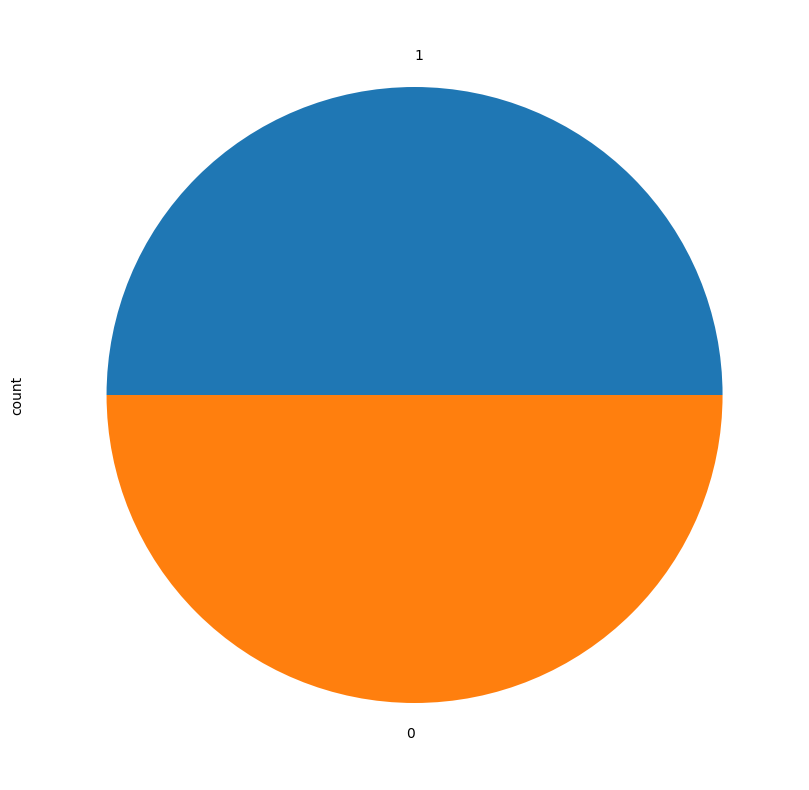

In [ ]:
df.Domain.value_counts().plot(kind='pie', figsize=(10,10))

In [ ]:
df.head()

,text,Label,Domain,About
673,මොනව කලත් ඒ වෙලාවෙි කොන්ද කෙලින් තියාගන තීරණගත...,Positive,1,Rajapaksha
840,රටේ ඉන්න පව් කාරයෝ ටික නැති වෙලා යන්න ඕන,Negative,0,NaN
37,ඔය වගේ සාකච්ඡා වලට කය්ය නායකයිනට මහින්දලට කත...,Positive,1,Ranil
949,ඔයා තන්හාවට අගමැති නොවි හිටියනම් ඔය මුකුත් නැනේ,Negative,1,Ranil
476,කවුරුහරි මෙවැනි නිවුස් කල්යල් බලා කැට දානවා හ...,Negative,1,225


In [ ]:

data_texts = df['text'].to_list()

data_labels = df['Domain'].to_list()

In [ ]:
label_set = set(data_labels)

In [ ]:
label_set

{0, 1}

In [ ]:
df.head()

,text,Label,Domain,About
673,මොනව කලත් ඒ වෙලාවෙි කොන්ද කෙලින් තියාගන තීරණගත...,Positive,1,Rajapaksha
840,රටේ ඉන්න පව් කාරයෝ ටික නැති වෙලා යන්න ඕන,Negative,0,NaN
37,ඔය වගේ සාකච්ඡා වලට කය්ය නායකයිනට මහින්දලට කත...,Positive,1,Ranil
949,ඔයා තන්හාවට අගමැති නොවි හිටියනම් ඔය මුකුත් නැනේ,Negative,1,Ranil
476,කවුරුහරි මෙවැනි නිවුස් කල්යල් බලා කැට දානවා හ...,Negative,1,225


In [ ]:
import numpy as np
contents = [content for content in df.text]

max_content_len = 0

content_len = []
for content in contents:
    content_len.append(len(content.split()))
    max_content_len = max(len(content.split()), max_content_len)

print('Number of contents:', len(contents))
print('Max length of the contents:', max_content_len)
print('Mean length of the contents:', np.mean(content_len))

Number of contents: 558
Max length of the contents: 246
Mean length of the contents: 16.017921146953405


# Model and Training

In [ ]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained('NLPC-UOM/SinBERT-small', num_labels=NUM_LABELS)  #  binary classi

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/635 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/266M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at NLPC-UOM/SinBERT-small and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.config

RobertaConfig {
  "_name_or_path": "NLPC-UOM/SinBERT-small",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 6,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.42.4",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 30000
}

# Train, Test, Validation Split

In [ ]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM
tokenizer = AutoTokenizer.from_pretrained("NLPC-UOM/SinBERT-small",force_download = True)

# train_encodings = tokenizer(train_texts,max_length = 512, truncation = True, padding = "max_length"  )

# val_encodings = tokenizer(val_texts, max_length = 512,truncation = True, padding = "max_length" )

# test_encodings = tokenizer(test_texts, max_length = 512,truncation = True, padding = "max_length" )


config.json:   0%|          | 0.00/635 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/839k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/639k [00:00<?, ?B/s]

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset

In [ ]:
class FakeNewsDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=208):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = self.data.iloc[idx]['text']
        label = torch.tensor(self.data.iloc[idx]['Domain'], dtype=torch.long)

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_length,
            padding='max_length',
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'label': label}


# model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Create datasets and data loaders
train_dataset = FakeNewsDataset(train_df, tokenizer)
val_dataset = FakeNewsDataset(val_df, tokenizer)
test_dataset = FakeNewsDataset(test_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Set up optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=5e-6)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
NUM_EPOCHS = 50
train_losses = []
val_losses = []
val_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(NUM_EPOCHS):
    # Training
    model.train()
    train_loss = 0.0
    all_preds = []
    all_labels = []

    loop = tqdm(train_loader)
    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.logits, 1)

        all_preds.extend(preds.cpu().tolist())
        all_labels.extend(labels.cpu().tolist())

        train_loss += loss.item()

        loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        loop.set_postfix(loss=train_loss / len(loop), acc=accuracy_score(all_preds, all_labels))

    # Validation
    model.eval()
    val_loss = 0.0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for batch in tqdm(val_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            _, preds = torch.max(outputs.logits, 1)

            val_preds.extend(preds.cpu().tolist())
            val_labels.extend(labels.cpu().tolist())

            val_loss += loss.item()

# training
    model.eval()
    test_loss = 0.0
    all_test_preds = []
    all_test_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            _, test_preds = torch.max(outputs.logits, 1)

            all_test_preds.extend(test_preds.tolist())
            all_test_labels.extend(labels.tolist())

            test_loss += loss.item()

    test_accuracy = accuracy_score(all_test_labels, all_test_preds)
    test_accuracies.append(test_accuracy)

    train_acc = accuracy_score(all_preds, all_labels)
    val_acc = accuracy_score(val_preds, val_labels)

    train_losses.append(train_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_acc)
    train_accuracies.append(train_acc)

    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}] - Training Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")

100%|██████████| 2/2 [00:17<00:00,  8.73s/it]


Epoch [1/50] - Training Accuracy: 0.5269, Validation Accuracy: 0.5536


100%|██████████| 2/2 [00:16<00:00,  8.45s/it]


Epoch [2/50] - Training Accuracy: 0.5673, Validation Accuracy: 0.5714


100%|██████████| 2/2 [00:16<00:00,  8.43s/it]


Epoch [3/50] - Training Accuracy: 0.6682, Validation Accuracy: 0.6250


100%|██████████| 2/2 [00:16<00:00,  8.45s/it]


Epoch [4/50] - Training Accuracy: 0.6861, Validation Accuracy: 0.5714


100%|██████████| 2/2 [00:16<00:00,  8.46s/it]


Epoch [5/50] - Training Accuracy: 0.7108, Validation Accuracy: 0.6071


100%|██████████| 2/2 [00:16<00:00,  8.48s/it]


Epoch [6/50] - Training Accuracy: 0.7534, Validation Accuracy: 0.6429


100%|██████████| 2/2 [00:16<00:00,  8.37s/it]


Epoch [7/50] - Training Accuracy: 0.7601, Validation Accuracy: 0.6429


100%|██████████| 2/2 [00:16<00:00,  8.35s/it]


Epoch [8/50] - Training Accuracy: 0.7937, Validation Accuracy: 0.6250


100%|██████████| 2/2 [00:16<00:00,  8.33s/it]


Epoch [9/50] - Training Accuracy: 0.7870, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:16<00:00,  8.32s/it]


Epoch [10/50] - Training Accuracy: 0.8072, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:16<00:00,  8.30s/it]


Epoch [11/50] - Training Accuracy: 0.8318, Validation Accuracy: 0.6429


100%|██████████| 2/2 [00:16<00:00,  8.31s/it]


Epoch [12/50] - Training Accuracy: 0.8184, Validation Accuracy: 0.6429


100%|██████████| 2/2 [00:17<00:00,  8.87s/it]


Epoch [13/50] - Training Accuracy: 0.8677, Validation Accuracy: 0.6786


100%|██████████| 2/2 [00:18<00:00,  9.05s/it]


Epoch [14/50] - Training Accuracy: 0.8789, Validation Accuracy: 0.6786


100%|██████████| 2/2 [00:17<00:00,  8.83s/it]


Epoch [15/50] - Training Accuracy: 0.8722, Validation Accuracy: 0.6786


100%|██████████| 2/2 [00:17<00:00,  8.81s/it]


Epoch [16/50] - Training Accuracy: 0.9215, Validation Accuracy: 0.6786


100%|██████████| 2/2 [00:16<00:00,  8.40s/it]


Epoch [17/50] - Training Accuracy: 0.9170, Validation Accuracy: 0.6786


100%|██████████| 2/2 [00:16<00:00,  8.31s/it]


Epoch [18/50] - Training Accuracy: 0.9350, Validation Accuracy: 0.6964


100%|██████████| 2/2 [00:16<00:00,  8.30s/it]


Epoch [19/50] - Training Accuracy: 0.9462, Validation Accuracy: 0.6786


100%|██████████| 2/2 [00:16<00:00,  8.34s/it]


Epoch [20/50] - Training Accuracy: 0.9709, Validation Accuracy: 0.6786


100%|██████████| 2/2 [00:16<00:00,  8.33s/it]


Epoch [21/50] - Training Accuracy: 0.9664, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:16<00:00,  8.34s/it]


Epoch [22/50] - Training Accuracy: 0.9821, Validation Accuracy: 0.7143


100%|██████████| 2/2 [00:17<00:00,  8.57s/it]


Epoch [23/50] - Training Accuracy: 0.9821, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:17<00:00,  8.90s/it]


Epoch [24/50] - Training Accuracy: 0.9798, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:16<00:00,  8.44s/it]


Epoch [25/50] - Training Accuracy: 0.9821, Validation Accuracy: 0.6964


100%|██████████| 2/2 [00:16<00:00,  8.32s/it]


Epoch [26/50] - Training Accuracy: 0.9843, Validation Accuracy: 0.6786


100%|██████████| 2/2 [00:16<00:00,  8.34s/it]


Epoch [27/50] - Training Accuracy: 0.9821, Validation Accuracy: 0.6786


100%|██████████| 2/2 [00:16<00:00,  8.36s/it]


Epoch [28/50] - Training Accuracy: 0.9933, Validation Accuracy: 0.6786


100%|██████████| 2/2 [00:18<00:00,  9.01s/it]


Epoch [29/50] - Training Accuracy: 0.9933, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:17<00:00,  8.93s/it]


Epoch [30/50] - Training Accuracy: 0.9888, Validation Accuracy: 0.6786


100%|██████████| 2/2 [00:16<00:00,  8.31s/it]


Epoch [31/50] - Training Accuracy: 0.9933, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:16<00:00,  8.32s/it]


Epoch [32/50] - Training Accuracy: 0.9933, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:16<00:00,  8.31s/it]


Epoch [33/50] - Training Accuracy: 0.9955, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:16<00:00,  8.31s/it]


Epoch [34/50] - Training Accuracy: 0.9933, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:16<00:00,  8.34s/it]


Epoch [35/50] - Training Accuracy: 0.9955, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:16<00:00,  8.32s/it]


Epoch [36/50] - Training Accuracy: 1.0000, Validation Accuracy: 0.6429


100%|██████████| 2/2 [00:17<00:00,  8.56s/it]


Epoch [37/50] - Training Accuracy: 1.0000, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:17<00:00,  8.73s/it]


Epoch [38/50] - Training Accuracy: 0.9978, Validation Accuracy: 0.6429


100%|██████████| 2/2 [00:16<00:00,  8.33s/it]


Epoch [39/50] - Training Accuracy: 1.0000, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:16<00:00,  8.34s/it]


Epoch [40/50] - Training Accuracy: 0.9978, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:16<00:00,  8.32s/it]


Epoch [41/50] - Training Accuracy: 0.9955, Validation Accuracy: 0.6786


100%|██████████| 2/2 [00:17<00:00,  8.67s/it]


Epoch [42/50] - Training Accuracy: 0.9978, Validation Accuracy: 0.6429


100%|██████████| 2/2 [00:16<00:00,  8.36s/it]


Epoch [43/50] - Training Accuracy: 1.0000, Validation Accuracy: 0.6429


100%|██████████| 2/2 [00:16<00:00,  8.31s/it]


Epoch [44/50] - Training Accuracy: 1.0000, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:16<00:00,  8.29s/it]


Epoch [45/50] - Training Accuracy: 0.9955, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:16<00:00,  8.32s/it]


Epoch [46/50] - Training Accuracy: 0.9978, Validation Accuracy: 0.6786


100%|██████████| 2/2 [00:16<00:00,  8.32s/it]


Epoch [47/50] - Training Accuracy: 0.9978, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:16<00:00,  8.32s/it]


Epoch [48/50] - Training Accuracy: 0.9978, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:20<00:00, 10.10s/it]


Epoch [49/50] - Training Accuracy: 1.0000, Validation Accuracy: 0.6607


100%|██████████| 2/2 [00:19<00:00,  9.57s/it]


Epoch [50/50] - Training Accuracy: 1.0000, Validation Accuracy: 0.6607


In [ ]:
torch.save(model,'model_2.pth')

# Training Accuracy and Validation Accuracy

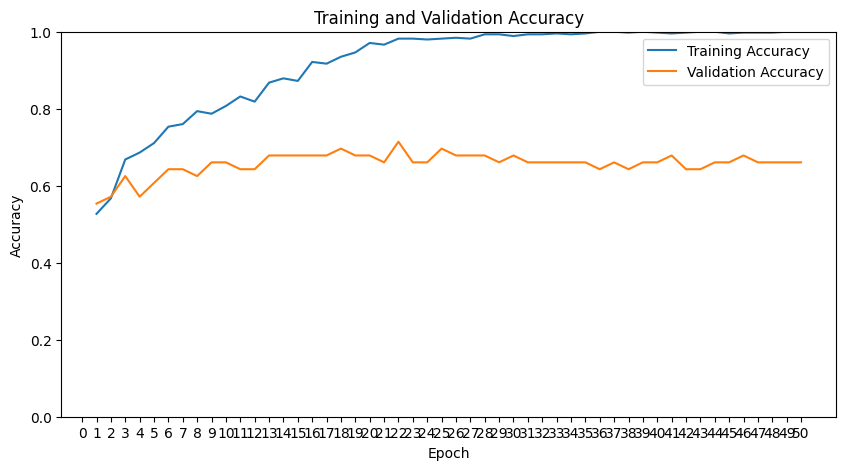

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, NUM_EPOCHS + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, NUM_EPOCHS + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(range(NUM_EPOCHS + 1))
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Training and Validation Loss

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(NUM_EPOCHS + 1))
plt.title('Training and Validation Loss')
plt.ylim(0,1)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
class_report = classification_report(all_test_labels, all_test_preds)
class_report = classification_report(all_test_labels, all_test_preds,target_names = ['Political','Non Political'])
print(class_report)

               precision    recall  f1-score   support

    Political       0.62      0.73      0.67        22
Non Political       0.80      0.71      0.75        34

     accuracy                           0.71        56
    macro avg       0.71      0.72      0.71        56
 weighted avg       0.73      0.71      0.72        56



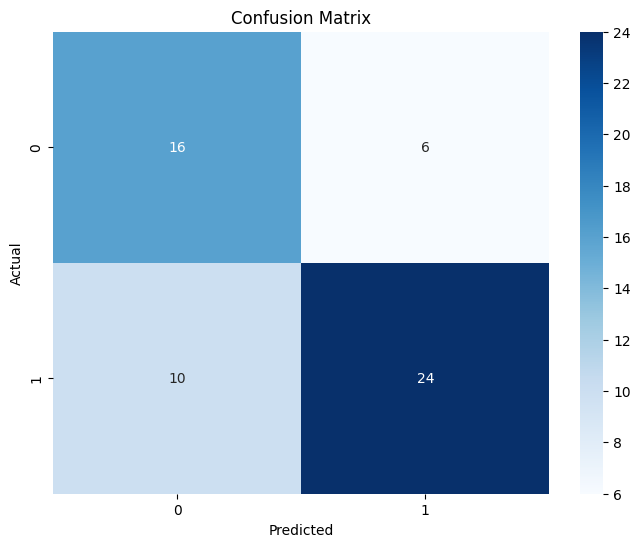

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(all_test_labels, all_test_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
#sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Neutral', 'Negative', 'Positive'], yticklabels=['Neutral', 'Negative','Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Test Accuracy

In [ ]:
model_checkpoint = "model_2.pth"
model = torch.load(model_checkpoint)
model = model.to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

test_train_accuracies = []

def calculate_accuracy(data_loader, test_model):
    test_model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = test_model(input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, 1)
            all_preds.extend(preds.tolist())
            all_labels.extend(labels.tolist())

    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

test_accuracy = calculate_accuracy(test_loader, model)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.7143


In [ ]:
epochs = range(1, NUM_EPOCHS + 1)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, test_accuracies, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()